## Part1, Task3 ---- Version 3

#### In this implementation, I set the hyperparameters as follow:

- *hidden_units = '500 100 10'*

- *learning_rate = 1e-2*

- *epoch = 2*

- *batch_size = 4*

#### Optimization:

- SGD optimizer **without** momentum, regularization or dropout.
- The main optimization of version 3 is the units number of hidden layer and layer number. After I increase the number of the layers and the unit number of one layer, the average training and testing accuracy are higher than before(version 1 and 2).


#### Result Analaysis:

- The loss almost reaches convergence. 
- The training accuracy oscillates and the average is about 50%. 
- The testing accuracy is about 49%.



In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
from pytorch_mlp import *
from sklearn import datasets
import random
from torch.autograd import Variable
import time


# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '500 100 10'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 2
EVAL_FREQ_DEFAULT = 10
BATCH_SIZE = 4

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])
trainset = dset.CIFAR10('./', train=True, transform=transform, target_transform=None, download=False)
testset = dset.CIFAR10('./', train=False, transform=transform, target_transform=None, download=False)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [6]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

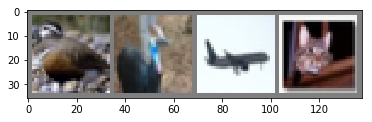

 bird      bird     plane       cat

trainloader lengh: 12500
dataiter lengh: 12500


In [7]:
# show some random training images
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
dataiter = iter(trainloader)
images, labels = dataiter.next()
 
# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print('     '.join('%5s'%classes[labels[j]] for j in range(4)))
print()
dataiter = iter(trainloader)
print("trainloader lengh: "+str(len(trainloader)))
print("dataiter lengh: "+str(len(dataiter)))

In [9]:
def train():
    """
    Performs training and evaluation of MLP model.
    NOTE: You should the model on the whole test set each eval_freq iterations.
    """
    # YOUR TRAINING CODE GOES HERE
    n_inputs = 3072
    
    n_hidden = list(map(int, DNN_HIDDEN_UNITS_DEFAULT.split()))

    n_classes = len(classes)

    mlp = PT_MLP(n_inputs, n_hidden, n_classes)
    
    # Loss and Optimizer
    criterion = nn.CrossEntropyLoss() 

    optimizer = torch.optim.SGD(mlp.parameters(), lr=LEARNING_RATE_DEFAULT)
    
    losses = []
    accuracy = []
    
    for epoch in range(MAX_EPOCHS_DEFAULT):
        timestart = time.time()
        running_loss = 0.0
        total = 0
        correct = 0
        for step, (batch_x, batch_y) in enumerate(trainloader):
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward + Backward + Optimize
            batch_x = batch_x.view(-1,3072)
            outputs = mlp(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()
            # print("step ",step)
            if step % 500 == 499:  # print every 500 mini-batches
                    print('[%d, %5d] loss: %.4f' %
                          (epoch, step, running_loss / 500))
                    losses.append(running_loss / 500)
                    running_loss = 0.0
                    _, predicted = torch.max(outputs.data, 1)
                    total += batch_y.size(0)
                    correct += (predicted == batch_y).sum().item()
                    print('Accuracy of the network on the %d tran images: %.3f %%' % (total,
                            100.0 * correct / total))
                    accuracy.append(100.0 * correct / total)
                    total = 0
                    correct = 0
                    
        print('epoch %d cost %3f sec' %(epoch,time.time()-timestart))
    print('Finished Training')
    return mlp, losses, accuracy

In [10]:
mlp, losses, accuracy = train()

[0,   499] loss: 2.2900
Accuracy of the network on the 4 tran images: 0.000 %
[0,   999] loss: 2.1830
Accuracy of the network on the 4 tran images: 25.000 %
[0,  1499] loss: 2.0168
Accuracy of the network on the 4 tran images: 0.000 %
[0,  1999] loss: 1.9359
Accuracy of the network on the 4 tran images: 25.000 %
[0,  2499] loss: 1.8952
Accuracy of the network on the 4 tran images: 0.000 %
[0,  2999] loss: 1.8558
Accuracy of the network on the 4 tran images: 25.000 %
[0,  3499] loss: 1.7410
Accuracy of the network on the 4 tran images: 50.000 %
[0,  3999] loss: 1.7208
Accuracy of the network on the 4 tran images: 25.000 %
[0,  4499] loss: 1.7379
Accuracy of the network on the 4 tran images: 0.000 %
[0,  4999] loss: 1.7522
Accuracy of the network on the 4 tran images: 75.000 %
[0,  5499] loss: 1.7084
Accuracy of the network on the 4 tran images: 25.000 %
[0,  5999] loss: 1.6579
Accuracy of the network on the 4 tran images: 50.000 %
[0,  6499] loss: 1.6792
Accuracy of the network on the 4

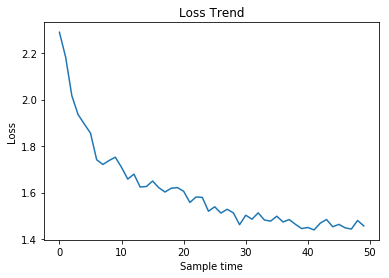

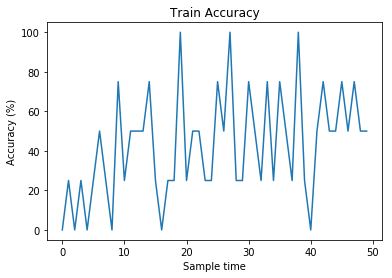

In [11]:
plt.title('Loss Trend')

plt.plot(losses)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()

plt.title('Train Accuracy')

plt.plot(accuracy)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()



In [20]:
def test(mlp):
    total = 0
    correct = 0
    accuracy = []
    for step, (batch_x, batch_y) in enumerate(testloader):
        batch_x = batch_x.view(-1,3072)
        outputs = mlp(batch_x)
        # print statistics
        # print("step ",step)
        if step % 20 == 19:  # print every 500 mini-batches
                _, predicted = torch.max(outputs.data, 1)
                total += batch_y.size(0)
                correct += (predicted == batch_y).sum().item()
                accuracy.append(100.0 * correct / total)
                total = 0
                correct = 0
    print('Finished Testing')
    return accuracy

In [21]:
test_accuracy = test(mlp)

Finished Testing


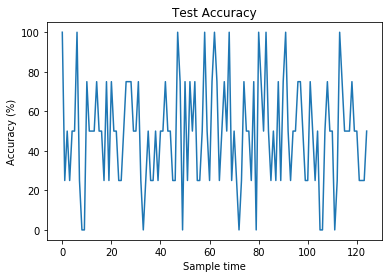

Average test accuracy is : 49.0


In [22]:
plt.title('Test Accuracy')

plt.plot(test_accuracy)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

avg_test_accuracy = np.mean(test_accuracy)
print("Average test accuracy is : " + str(avg_test_accuracy))